# Cancer Classification Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cancer.csv')
data.head()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.tail()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   thickness        699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epith_cell_size  699 non-null    int64 
 6   nuclei           699 non-null    object
 7   chromatin        699 non-null    int64 
 8   nucleoli         699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
len(data)

699

In [6]:
data.columns

Index(['id', 'thickness', 'cell_size', 'cell_shape', 'adhesion',
       'epith_cell_size', 'nuclei', 'chromatin', 'nucleoli', 'mitoses',
       'class'],
      dtype='object')

In [7]:
train_data = data.copy()

In [8]:
data.describe()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,chromatin,nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
data.isnull().sum()

id                 0
thickness          0
cell_size          0
cell_shape         0
adhesion           0
epith_cell_size    0
nuclei             0
chromatin          0
nucleoli           0
mitoses            0
class              0
dtype: int64

In [10]:
correlation = data.corr()['class']
correlation

id                -0.080226
thickness          0.716001
cell_size          0.817904
cell_shape         0.818934
adhesion           0.696800
epith_cell_size    0.682785
chromatin          0.756616
nucleoli           0.712244
mitoses            0.423170
class              1.000000
Name: class, dtype: float64

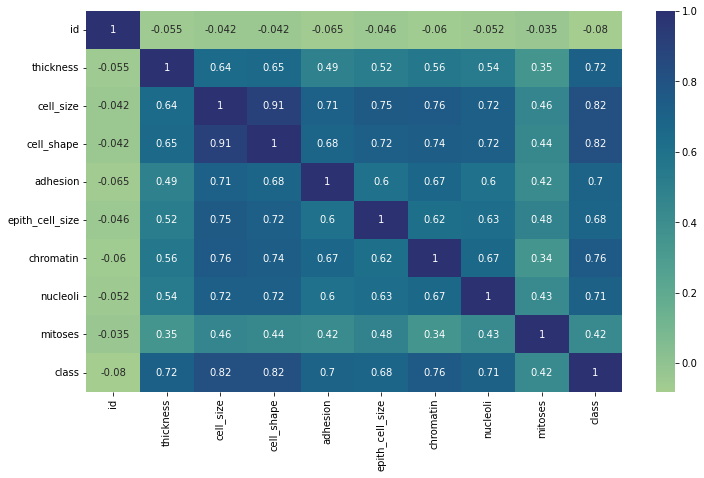

In [11]:
correlation = data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation,annot=True,cmap='crest')
plt.show()

In [12]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

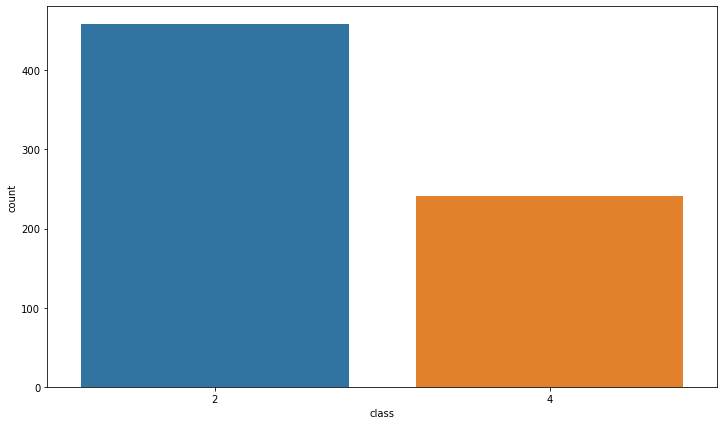

In [13]:
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='class')
plt.show()

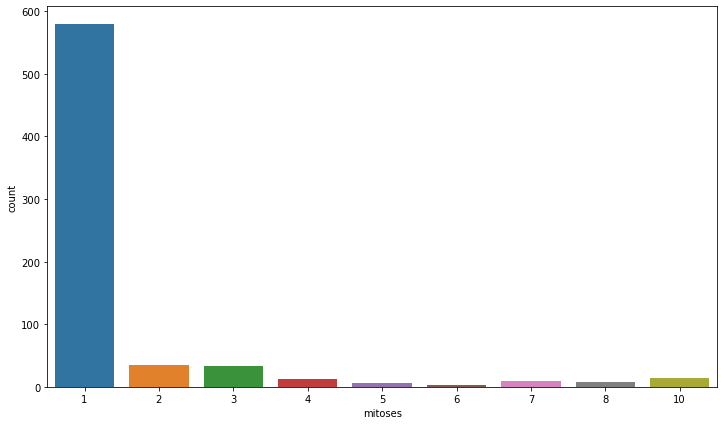

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='mitoses')
plt.show()

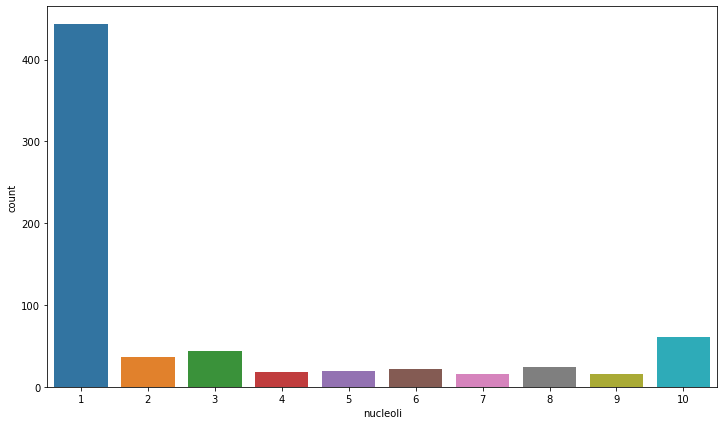

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='nucleoli')
plt.show()

<AxesSubplot:xlabel='nucleoli', ylabel='count'>

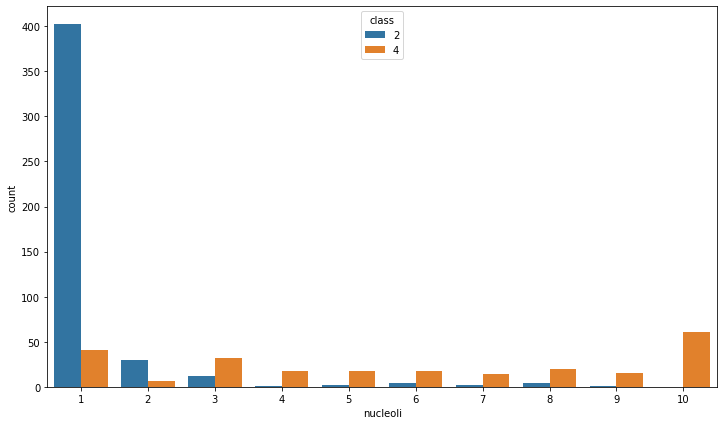

In [16]:
plt.figure(figsize=(12,7))

sns.countplot(data=data, x='nucleoli', hue='class')

<AxesSubplot:xlabel='cell_shape', ylabel='count'>

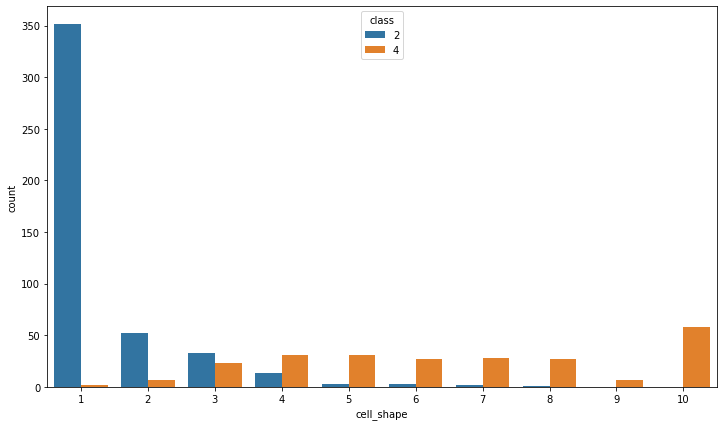

In [17]:
plt.figure(figsize=(12,7))

sns.countplot(data=data, x='cell_shape', hue='class')

<AxesSubplot:xlabel='adhesion', ylabel='Count'>

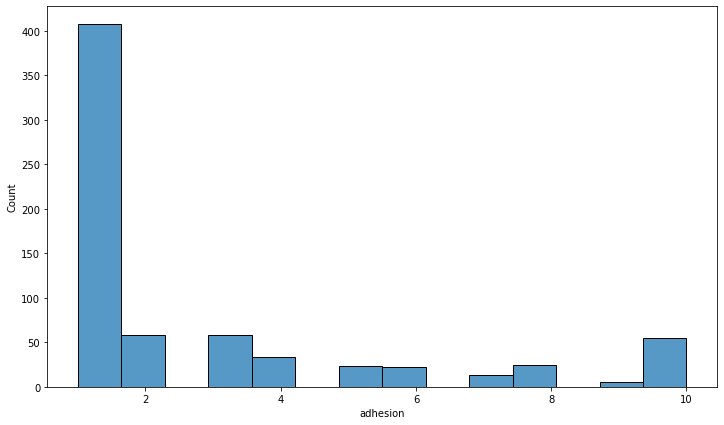

In [18]:
# Task 16: 
# Generate a histogram of the mobile weights i.e. "mobile_wt"
plt.figure(figsize=(12,7))

sns.histplot(data=data, x='adhesion')

<AxesSubplot:xlabel='chromatin', ylabel='Count'>

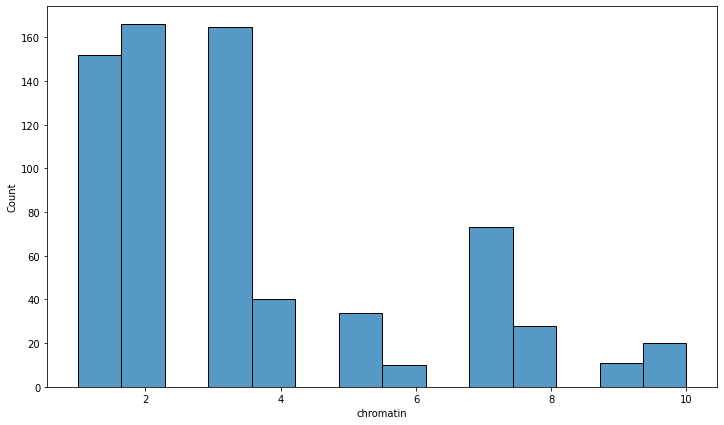

In [19]:
# Task 16: 
# Generate a histogram of the mobile weights i.e. "mobile_wt"
plt.figure(figsize=(12,7))

sns.histplot(data=data, x='chromatin')

<AxesSubplot:xlabel='cell_size', ylabel='thickness'>

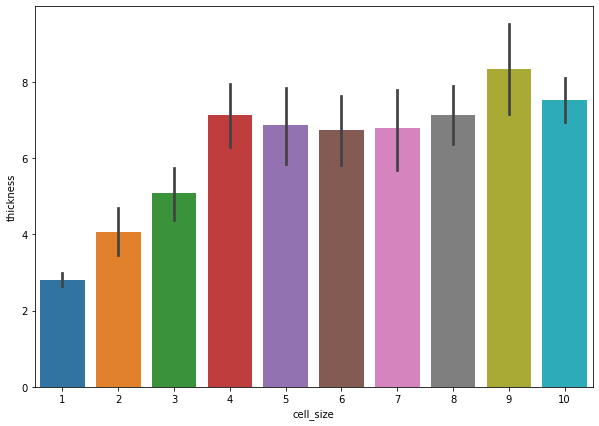

In [20]:
plt.figure(figsize=(10,7))
sns.barplot(data=data,x='cell_size',y='thickness')

<AxesSubplot:xlabel='cell_shape', ylabel='cell_size'>

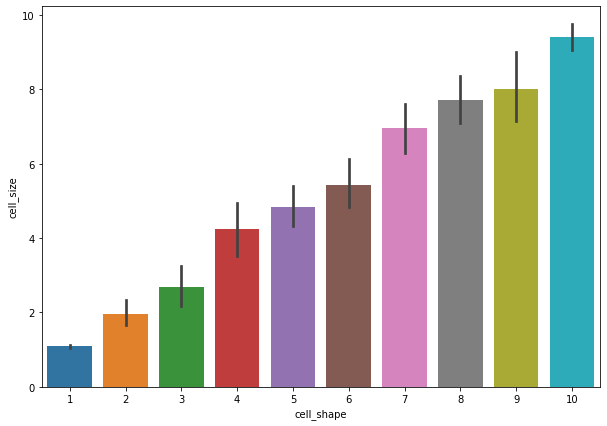

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(data=data,x='cell_shape',y='cell_size')

In [22]:
data['nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: nuclei, dtype: int64

In [23]:
data.nuclei.replace('?',1,inplace=True)

In [24]:
data.nuclei.eq('?').value_counts()

False    699
Name: nuclei, dtype: int64

In [44]:
training_data = data.drop('id',axis=1,inplace= True)

In [45]:
training_data = data.drop('class',axis=1)

In [46]:
training_label = data['class']

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
my_pipeline = Pipeline([
    ('scaling',MinMaxScaler())
    
])

In [48]:
training_data_preprocessed = my_pipeline.fit_transform(training_data)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [50]:
model.fit(training_data_preprocessed, training_label)

LogisticRegression()

In [51]:
score = model.score(training_data,training_label)
score

0.3447782546494993

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,training_data,training_label,
                         cv=10)

In [53]:
np.mean(scores)

0.9671428571428571

In [54]:
from sklearn.model_selection import cross_val_predict
training_labels_pred = cross_val_predict(model, training_data,
                                       training_label, cv=10)

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(training_label, training_labels_pred)

array([[447,  11],
       [ 12, 229]], dtype=int64)

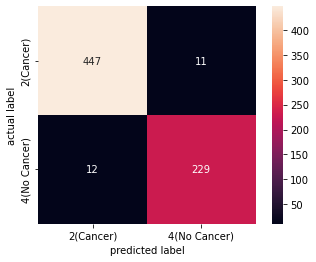

In [59]:
cm = confusion_matrix(training_label, training_labels_pred)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['2(Cancer)', '4(No Cancer)'],
                        yticklabels=['2(Cancer)', '4(No Cancer)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [60]:
from sklearn.metrics import accuracy_score

accuracy_score(training_label, training_labels_pred)

0.9670958512160229

In [61]:
from sklearn.metrics import classification_report

print(classification_report(training_label, training_labels_pred))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97       458
           4       0.95      0.95      0.95       241

    accuracy                           0.97       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.97      0.97      0.97       699

